In [101]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

In [102]:
X, Y = make_blobs(n_samples=1000, n_features=2, centers=2, random_state=2)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

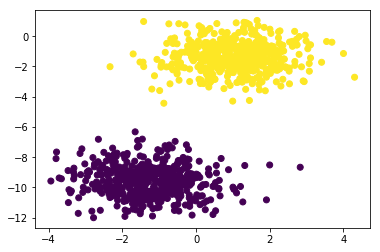

In [103]:
plt.scatter(X[:, 0], X[:, 1], c = Y)

In [104]:
model = LogisticRegression()

In [105]:
model.fit(X_train, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [106]:
model.predict(X_test)

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [95]:
def sigmoid(z):
    return 1 / ( 1 + np.exp(-z))

def hypothesis(x, theta):
    z = np.dot(x, theta)
    return sigmoid(z)

In [96]:
# theta = np.array([5])

# data = np.linspace(-5, 5, 100)

# y = []

# for x in data:
#     y.append(hypothesis(x, theta))
    
# plt.plot(data, y)

In [97]:
class LogisticRegression:
    
    def __init__(self, X, Y, lr, itrs):
        self.X_train = self.process(X)
        self.Y_train = Y
        self.theta = np.zeros([self.X_train.shape[1]])
        self.lr = lr
        self.itrs = itrs
        
    def process(self, data):
        data = np.hstack([np.ones([data.shape[0], 1]), data])
        return data
    
    def regression(self):
        gradient = np.zeros_like(self.theta)
        
        for xi, yi in zip(self.X_train, self.Y_train):
            gradient += (yi - hypothesis(xi, self.theta)) * xi
            
        gradient = gradient * self.lr / self.X_train.shape[0]
        
        self.theta += gradient
        
    def loss(self):
        
        log_like = 0
        for xi, yi in zip(self.X_train, self.Y_train):
            
            first = (yi * np.log(hypothesis(xi, self.theta)))
            second = ((1 - yi) * np.log(1 - hypothesis(xi, self.theta)))
            
            log_like +=  (first + second)
        
        return - log_like
    
    def run(self):
        
        losses = []
        
        for i in range(self.itrs):
            self.regression()
            losses.append(self.loss() / self.X_train.shape[0])
        
        return losses 
    
    def predict(self, sample):
        
        sample = self.process(sample)
        
        res = []
        
        for d in sample:
            value = hypothesis(d, self.theta)
            if value > .5:
                res.append(1)
            else:
                res.append(0)
        
        return res
        
        

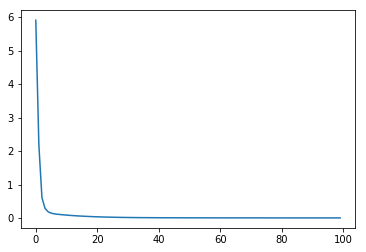

In [98]:
model = LogisticRegression(X_train, y_train, 5, 100)
losses = model.run()

plt.plot(losses)

[7.65337793 1.02020776 1.45674095] -10
[7.65337793 1.02020776 1.45674095] 10


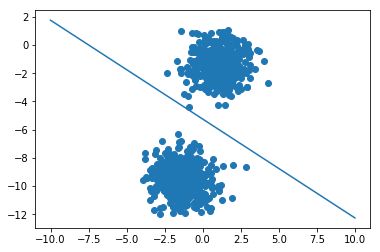

In [99]:
x1 = [-10, 10]
x2 = []

for x in x1:
    t = model.theta
    print(t, x)
    x2.append(-(t[0] + t[1]*x)/t[2])
    
plt.scatter(X[:, 0], X[:, 1])
plt.plot(x1, x2)

In [100]:
print(y_test)
print()

[0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 1
 1 1 0 1 1 0 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 1 0 0 0 1 1 1 0 1 1 1 1 0 0 1 1
 0 1 0 1 1 1 1 1 1 0 0 1 0 0 1 0 0 0 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1 0 1 0 1
 0 1 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 1 0 0 1 0 0 1 1 1 0 0 0 1 1 0 1 1
 1 1 0 0 0 0 1 1 1 0 1 1 1 0 1 0 1 1 0 0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 1 1 0
 0 0 1 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 1 1 0 1 1 0
 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 1 1 1 0 1 0 1 0 0 0 0 1 0 0 0 1 1 0 1 0 1
 0 1 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 1 0 1 1 0 1 1 0 0 0 0
 0 0 0 0]
[0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,